# The tutorial, but with a polynomial fit instead of a linear/regression fit

Fitting a polynomial to data happens to live in numpy's polynomial package (not scipy). In the homework we'll
go back to scipy, but with scipy's curve fit

https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyfit.html

In [1]:
import numpy as np
from numpy.polynomial import polynomial
import matplotlib.pyplot as plt

# Generate fake data
Fill in the bit where you use polynomial to generate the data and return the arrays

In [2]:
# Generate fake data - this time, use polynomial.polyval to generate the data, then add noise
def make_up_polynomial_data(poly=(1, 1, 1), x_range=(0, 1), n_samples=100, noise_sd = 0.1):
    """ Generate y = sum_i a_i x^i, over the given x range, and with the added (Gaussian) noise
    @param poly - the list of a_i values
    @param x_range - use x values in this range (input is a tuple)
    @param n_samples - number of samples to generate
    @param noise_sd - standard deviation of Gaussian noise (no mean-shift
    @returns two arrays, x and y, each of length n_samples"""

    # Use the code from the tutorial, with one change:
    #  Use polynomial.polyval to generate the polynomial values - make sure the input parameters are in
    #   the correct order (the x values first, then the polynomial)
    #   Don't forget to add noise
    # Note: The polynomial coefficents just need to be anything iterable - so a tuple works just fine here

    return [0, 1], [1, 1]


# Plot the data, the original quadratic, and the fitted quadratic

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


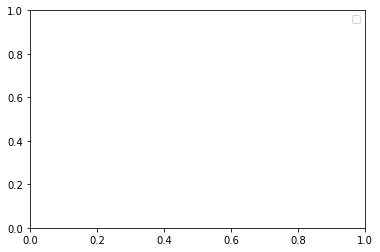

In [5]:
# I'm declaring variables here because we want to use the values later
my_poly_coeffs = (3.0, 0.0, 1.0)
my_x_range = (-0.5, 0.5)
x, y = make_up_polynomial_data(poly=my_poly_coeffs, x_range=my_x_range)

# Plot the curve the data came from and the data
#  Reminder to use a scatter plot for the data
#  Curve plot:
#  You'll need to use linspace to create an array of x values, then use polyval to create the y values
# Don't forget to set the axes to be equal

# To check: Does the polynomial look like what you'd expect from the coefficients?
# To play around with: Try changing the amount of noise and/or the number of samples and/or the expected degree.

# Now do the actual "fit" to the noisy data and plot the results
#  See numpy polyfit https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyfit.html
ret_poly = polynomial.polyfit(x, y, deg=2)

# Plot the fitted polyline, using polyval with the returned polynomial coefficients

plt.legend()


# Solution

In [6]:
# What the function should look like
# Note that we can re-define a function (with the same name) just like we would redefine a variable, 
# but in general, this is a really, really bad idea
def make_up_polynomial_data(poly=(1, 1, 1), x_range=(0, 1), n_samples=100, noise_sd = 0.1):
    """ Generate y = sum_i a_i x^i, over the given x range, and with the added (Gaussian) noise
    @param poly - the list of a_i values
    @param x_range - use x values in this range (input is a tuple)
    @param n_samples - number of samples to generate
    @param noise_sd - standard deviation of Gaussian noise (no mean-shift
    @returns two arrays, x and y, each of length n_samples"""

    # Use the code from the tutorial, with one change:
    #  Use polynomial.polyval to generate the polynomial values - make sure the input parameters are in
    #   the correct order (the x values first, then the polynomial)
    #   Don't forget to add noise

    # Use uniform here because we want a relatively even distrubution of samples in the x direction
    x_vals = np.random.uniform(x_range[0]   , x_range[1], n_samples)
    # Generate y values from x using the equation
    y_vals = polynomial.polyval(x_vals, poly)

    # Add noise
    y_vals += np.random.normal(loc=0.0, scale=noise_sd, size=n_samples)

    # This returns a tuple with two numpy arrays in it - you can put in the parenthesis, but you don't need to
    return x_vals, y_vals


# Plot data, plot original curve, and plot fitted curve

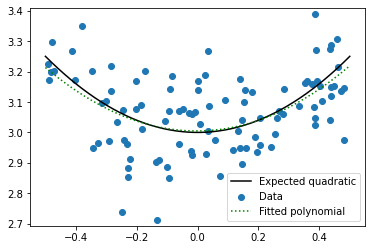

In [7]:
# Plot the curve the data came from
#  Note: This time use linspace to generate samples in my_x_range. This should still work properly even if the x range
#   is changed (i.e., use my_x_range in linspace)
#  Use polyval again to generate points along the polynomial
my_x_values = np.linspace(my_x_range[0], my_x_range[1])
plt.plot(my_x_values, polynomial.polyval(my_x_values, my_poly_coeffs), '-k', label="Expected quadratic")

# Plot the data - use a scatter plot because the data isn't in any order
plt.scatter(x, y, label="Data")

plt.axis('equal')

# Now do the actual "fit" to the noisy data and plot the results
ret_poly = polynomial.polyfit(x, y, deg=2)

# Plot the fitted polyline, using polyval with the returned polynomial coefficients
plt.plot(my_x_values, polynomial.polyval(my_x_values, ret_poly), ':g', label="Fitted polynomial")


plt.legend()
